# Face Detection using Haar Cascades.

In [1]:
import numpy as np
import cv2

print('OpenCV: ', cv2.__version__)
print('Numpy : ', np.__version__)

import matplotlib.pyplot as plt

%matplotlib inline

OpenCV:  3.4.4
Numpy :  1.14.2


In [2]:
img = cv2.imread('./Images/boy.jpg')
print(img.shape)

(1424, 2144, 3)


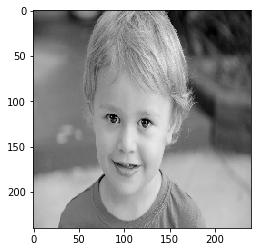

In [3]:
# Face detection using Haar - Cascade classifier
#read the Image

img = cv2.resize(img, (240,240))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imwrite('./Images/boy_gray.jpg', gray)
gray = cv2.imread('./Images/boy_gray.jpg')

#cv2.imshow('Image', img)
#cv2.waitKey(0)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(gray)
plt.show()

In [4]:
#detect Face

xml_path= '/usr/local/Cellar/opencv/3.4.1_2/share/OpenCV/haarcascades/haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(xml_path)
print(face_cascade)

<CascadeClassifier 0x10f30f930>


In [5]:
# detect eyes
eye_xml = '/usr/local/Cellar/opencv/3.4.1_2/share/OpenCV/haarcascades/haarcascade_eye.xml'
eye_cascade = cv2.CascadeClassifier(eye_xml)

In [6]:
eye_cascade

<CascadeClassifier 0x1113cd870>

In [7]:
faces = face_cascade.detectMultiScale(rgb_img)

# , scaleFactor=1.1, 
#	minNeighbors=5)                                       
#minSize=(30, 30),
#flags=cv2.CASCADE_SCALE_IMAGE)

print(faces)

[[ 49  80 112 112]]


In [8]:
## draw the rectangles
for (fx, fy, fw, fh) in faces:
    print(fx, ' ', fy, ' ', fw, ' ', fh)
    cv2.rectangle(rgb_img, (fx, fy), (fx+fw, fy+fh), (0,0,255), 2)
    
    # create the region of interest to identfy the eyes
    roi_gray  = gray[fy:fy+fh, fx:fx+fw]
    roi_color = rgb_img[fy:fy+fh, fx:fx+fw]
    eyes = eye_cascade.detectMultiScale(roi_color)
    print(eyes)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (255,0,0), 2)



49   80   112   112
[[23 24 31 31]
 [59 31 28 28]]


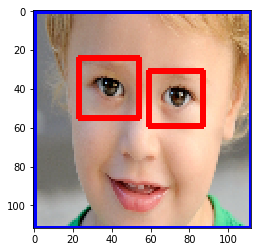

In [9]:
plt.imshow(roi_color)
plt.show()

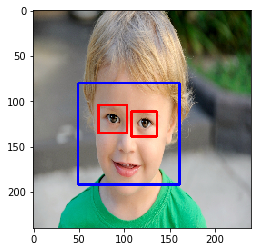

In [11]:
#plt.imshow(gray)
plt.imshow(rgb_img)
plt.show()